# Aplication of hadamard gate to n number of qubits

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import matplotlib.pyplot as plt
import numpy as np

n = 7 #number of qubits
grover = QuantumCircuit(n)

def hadamard(qcircuit, x): #Apply a H-gate to x number of qubits in qcircuit
    for i in range(x):
        qcircuit.h(i)
    return qcircuit

grover = hadamard(grover, n)
grover.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     ├───┤
q_4: ┤ H ├
     ├───┤
q_5: ┤ H ├
     ├───┤
q_6: ┤ H ├
     └───┘

#### We chose n = 5 qubits but could have chosen different n

# Creation of Oracle

In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import matplotlib.pyplot as plt
import numpy as np

n = 3 #number of qubits
grover = QuantumCircuit(n)

def hadamard(qcircuit, x): #Apply a H-gate to x number of qubits in qcircuit
    for i in range(x):
        qcircuit.h(i)
    return qcircuit

grover = hadamard(grover, n)

def oracle(x,i): #x is number of qubits and i is number of solution qubit 
    #ie if number of qubits is x, then i has to be between 1 and 2^x
    #in the case of 3 qubits i=1 000, i=2 001, i=3 010, i=4 011, etc
    oracle = np.identity(2**x)
    oracle[i,i]= -1
    return oracle

oraclematrix = oracle(n,3)

print(oraclematrix)

[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]


#### Where we selected this time 3 qubits to be able to see the oracle matrix easier. We wrote the true value to be in qubit 011

# Implementation of oracle

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import matplotlib.pyplot as plt
import numpy as np
import qiskit.quantum_info as qi

n = 3 #number of qubits
grover = QuantumCircuit(n)

def hadamard(qcircuit, x): #Apply a H-gate to x number of qubits in qcircuit
    for i in range(x):
        qcircuit.h(i)
    return qcircuit

grover = hadamard(grover, n)

def oracle(x,i): #x is number of qubits and i is number of solution qubit 
    #ie if number of qubits is x, then i has to be between 1 and 2^x
    #in the case of 3 qubits i=1 000, i=2 001, i=3 010, i=4 011, etc
    oracle = np.identity(2**x)
    oracle[i,i]= -1
    return oracle

oraclematrix = oracle(n,2)

oracle_op = qi.Operator(oraclematrix)

grover.unitary(oracle_op, range(n), label='ORACLE')

grover.draw()


┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│         │
q_1: ┤ H ├┤1 ORACLE ├
     ├───┤│         │
q_2: ┤ H ├┤2        ├
     └───┘└─────────┘

# Creation of diffusion operator

In [22]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt
import numpy as np
import qiskit.quantum_info as qi

n = 3 #number of qubits
grover = QuantumCircuit(n)
simulator = Aer.get_backend('aer_simulator')

def hadamard(qcircuit, x): #Apply a H-gate to x number of qubits in qcircuit
    for i in range(x):
        qcircuit.h(i)
    return qcircuit

grover = hadamard(grover, n)

def oracle(x,i): #x is number of qubits and i is number of solution qubit 
    #ie if number of qubits is x, then i has to be between 1 and 2^x
    #in the case of 3 qubits i=0 000, i=1 001, i=2 010, i=3 011, etc
    oracle = np.identity(2**x)
    oracle[i,i]= -1
    return oracle

oraclematrix = oracle(n,3)

oracle_op = qi.Operator(oraclematrix)


def op_j(x): #creates operator J, x is number of qubits
    j = -1*np.identity(2**x)
    j[0,0]= 1
    return j

def diffusion(x,circuit): #x is number of qubits
    hadamard(circuit,x)
    j_matrix = op_j(x)
    j_op = qi.Operator(j_matrix)
    circuit.unitary(j_op,range(x),label='J')
    hadamard(circuit,x)
    return circuit

iterations= int(np.ceil(np.sqrt(2**n)))

for i in range(iterations):
    grover.unitary(oracle_op, range(n), label='ORACLE')
    diffusion(n,grover)

grover.measure_all()
print(grover)

job = simulator.run(grover, shots=1024)
result = job.result()
counts = result.get_counts(grover)
print("\ntotal count:", counts)
    

        ┌───┐┌─────────┐┌───┐┌────┐┌───┐┌─────────┐┌───┐┌────┐┌───┐┌─────────┐»
   q_0: ┤ H ├┤0        ├┤ H ├┤0   ├┤ H ├┤0        ├┤ H ├┤0   ├┤ H ├┤0        ├»
        ├───┤│         │├───┤│    │├───┤│         │├───┤│    │├───┤│         │»
   q_1: ┤ H ├┤1 ORACLE ├┤ H ├┤1 J ├┤ H ├┤1 ORACLE ├┤ H ├┤1 J ├┤ H ├┤1 ORACLE ├»
        ├───┤│         │├───┤│    │├───┤│         │├───┤│    │├───┤│         │»
   q_2: ┤ H ├┤2        ├┤ H ├┤2   ├┤ H ├┤2        ├┤ H ├┤2   ├┤ H ├┤2        ├»
        └───┘└─────────┘└───┘└────┘└───┘└─────────┘└───┘└────┘└───┘└─────────┘»
meas: 3/══════════════════════════════════════════════════════════════════════»
                                                                              »
«        ┌───┐┌────┐┌───┐ ░ ┌─┐      
«   q_0: ┤ H ├┤0   ├┤ H ├─░─┤M├──────
«        ├───┤│    │├───┤ ░ └╥┘┌─┐   
«   q_1: ┤ H ├┤1 J ├┤ H ├─░──╫─┤M├───
«        ├───┤│    │├───┤ ░  ║ └╥┘┌─┐
«   q_2: ┤ H ├┤2   ├┤ H ├─░──╫──╫─┤M├
«        └───┘└────┘└───┘ ░  ║  ║ └╥┘
«meas: 3/═════

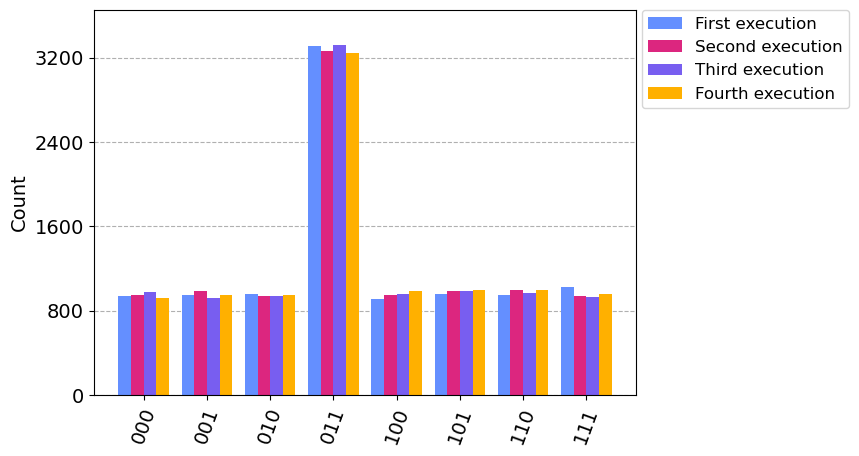

In [26]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt
import numpy as np
import qiskit.quantum_info as qi

counts = []
n = 3 #number of qubits
grover = QuantumCircuit(n)
simulator = Aer.get_backend('aer_simulator')

def hadamard(qcircuit, x): #Apply a H-gate to x number of qubits in qcircuit
    for i in range(x):
        qcircuit.h(i)
    return qcircuit

grover = hadamard(grover, n)

def oracle(x,i): #x is number of qubits and i is number of solution qubit 
    #ie if number of qubits is x, then i has to be between 1 and 2^x
    #in the case of 3 qubits i=0 000, i=1 001, i=2 010, i=3 011, etc
    oracle = np.identity(2**x)
    oracle[i,i]= -1
    return oracle

oraclematrix = oracle(n,3)

oracle_op = qi.Operator(oraclematrix)


def op_j(x): #creates operator J, x is number of qubits
    j = -1*np.identity(2**x)
    j[0,0]= 1
    return j

def diffusion(x,circuit): #x is number of qubits
    hadamard(circuit,x)
    j_matrix = op_j(x)
    j_op = qi.Operator(j_matrix)
    circuit.unitary(j_op,range(x),label='J')
    hadamard(circuit,x)
    return circuit

iterations= int(np.ceil(np.sqrt(2**n)))

for i in range(iterations):
    grover.unitary(oracle_op, range(n), label='ORACLE')
    diffusion(n,grover)

grover.measure_all()

for i in range(4):
    job = simulator.run(grover, shots=10000)
    result = job.result()
    c = result.get_counts(grover)
    counts.append(c)


legend = ['First execution', 'Second execution', 'Third execution', 'Fourth execution']
plot_histogram([counts[0], counts[1], counts[2], counts[3]], legend=legend, figsize=(7, 5), bar_labels=False)
